In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin
from math import pi
L_ = 2.
P_ = 6000.0

h_ = 0.1
b_ = 0.1
E_ = 200000000000.0
Q = 10000
c_ = P_*12/(E_*b_*(h_**3))
#c=3600000
#def u_actual(x):
    #if x < L_/2:
      #return c_*((1/12)*(x**3)-(1/16)*(L_**2)*x)
      # 300000*(x**3)-900000*x
      # -2368
    #else:
     # return c_*((1/4)*L_*(x**2)-(1/12)*(x**3)-(3/16)*(L_**2)*x+(1/48)*(L_**3))
      # 1800000*(x**2)-300000*(x**3)-2700000*x+600000

#def f(x):
    #if x < L_/2:
      #return c_*(x/2)
    #else:
      #return c_*((L_-x)/2)

def u_actual(x):
    return -(L_**4)*sin(pi*x/2)/(pi**4)
def f(x):
    return (L_**2)*sin(pi*x/2)/(pi**2)

def find_node(x, x_nodes):
    for i in range(1, len(x_nodes)):
        if x < x_nodes[i]:
            return i-1
    return len(x_nodes)-2

def solve(N):
    x_nodes = np.linspace(0, L_, N+1)
    Le = x_nodes[1] - x_nodes[0]

    K = np.zeros((N+1, N+1))
    for i in range(N):
        K[i][i:i+2] += [1, -1]
        K[i+1][i:i+2] += [-1, 1]
    if N == 5:
        print(x_nodes)
    K /= Le
    K[0][1], K[-1][-2] = 0, 0
    K[0][0], K[-1][-1] = 1, 1
    P = np.zeros((N+1, N+1))
    for i in range(N):
        P[i][i:i+2] += [2, 1]
        P[i+1][i:i+2] += [1, 2]

    P *= -Le / 6
    P[0][0:2] = [0, 0]
    P[-1][-2:] = [0, 0]
    if N == 5:
        print(f(0.4))
    P = np.dot(P, [f(interval) for interval in x_nodes])
    if N == 5:
        print(P)
    u_coeffs = np.linalg.solve(K, P)
    if N==5:
      print(u_coeffs)
    return x_nodes, u_coeffs, K

def approx(x, x_nodes, u_coeffs):
    dx = x_nodes[1] - x_nodes[0]
    output = np.zeros(len(x))
    for i in range(len(x)):
        k = find_node(x[i], x_nodes)
        a0 = (u_coeffs[k] * x_nodes[k+1] - u_coeffs[k+1] * x_nodes[k])/dx
        a1 = (u_coeffs[k] - u_coeffs[k+1])/-dx
        output[i] = a0 + a1*x[i] #(7)
    return output


def relative_errors(x_nodes, u_coeffs):
    x = np.linspace(0, L_, Q)
    u_h = np.array(approx(x, x_nodes, u_coeffs))
    u_ex = np.array([u_actual(i) for i in x])

    up_max = np.max(np.abs(u_ex - u_h))
    low_max = np.max(np.abs(u_ex))
    Er = up_max / low_max

    dx = x[1] - x[0]
    up_sum = np.sum((u_ex - u_h)**2*dx)
    low_sum = np.sum(u_ex**2*dx)
    ErL2 = np.sqrt(up_sum/low_sum)

    return Er, ErL2

[0.  0.4 0.8 1.2 1.6 2. ]
0.23822038995913405
[ 0.         -0.08922202 -0.14436426 -0.14436426 -0.08922202  0.        ]
[ 8.88178420e-17 -9.34345087e-02 -1.51180211e-01 -1.51180211e-01
 -9.34345087e-02  0.00000000e+00]
[[ 1.   0.   0.   0.   0.   0. ]
 [-2.5  5.  -2.5  0.   0.   0. ]
 [ 0.  -2.5  5.  -2.5  0.   0. ]
 [ 0.   0.  -2.5  5.  -2.5  0. ]
 [ 0.   0.   0.  -2.5  5.  -2.5]
 [ 0.   0.   0.   0.   0.   1. ]]
5 0.07960455633912346 0.06527614026670327
10 0.020145589068733993 0.016720175815317803
20 0.005114175068651184 0.0042054097174149905
40 0.0012834535518630678 0.0010529432433859399
80 0.00032117338607701715 0.00026333616627856527
160 8.030942220620432e-05 6.583995322662085e-05
320 2.0078610641505636e-05 1.646037712693725e-05
N	Er	order	ErL2	cond

5	7.96e-02	3.94e+00	6.53e-02	1.78e+01

10	2.01e-02	1.96e+00	1.67e-02	5.85e+01

20	5.11e-03	1.99e+00	4.21e-03	2.00e+02

40	1.28e-03	2.00e+00	1.05e-03	7.27e+02

80	3.21e-04	2.00e+00	2.63e-04	2.75e+03

160	8.03e-05	2.00e+00	6.58e-05	1.07

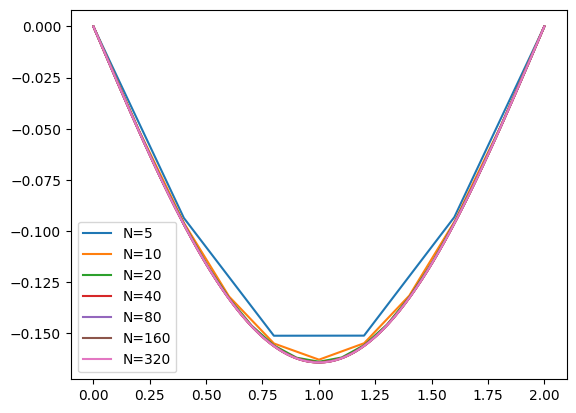

In [ ]:
x = np.linspace(0, L_, Q)
plt.plot(x, [u_actual(i) for i in x], 'r')
prevErL2=1
logs = []
for N in [5, 10, 20, 40, 80, 160, 320]:
    x_nodes, u_coeffs, K = solve(N)
    Er, ErL2 = relative_errors(x_nodes, u_coeffs)
    if N != 2:
        plt.plot(x, approx(x, x_nodes, u_coeffs), label=f'N={N}')
        logs.append(f"{N}\t"
                    f"{Er:.2e}\t"
                    f"{np.log2(prevErL2/ErL2):.2e}\t"
                    f"{ErL2:.2e}\t"
                    f"{np.linalg.cond(K):.2e}\n")
    if N == 5:
        print(K)
    print(N, Er, ErL2)
    prevErL2 = ErL2

for line in ['N\tEr\torder\tErL2\tcond\n'] + logs:
    print(line)
plt.legend()
plt.show()